<a href="https://colab.research.google.com/github/Enzo0501/Atividade_Parcial2/blob/main/TrabalhoSmartSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/vgsales.csv'
data = pd.read_csv(file_path)

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(   Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  ,
 None)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

data_filtered = data.drop(columns=['Rank', 'Name', 'Global_Sales'])

data_filtered.dropna(inplace=True)

label_encoders = {}
for column in ['Platform', 'Genre', 'Publisher']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    label_encoders[column] = le

X = data_filtered.drop(columns=['Genre'])
y = data_filtered['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.2786130714943234,
 '              precision    recall  f1-score   support\n\n           0       0.29      0.54      0.37       644\n           1       0.30      0.27      0.28       259\n           2       0.21      0.07      0.11       149\n           3       0.26      0.22      0.24       378\n           4       0.26      0.09      0.14       182\n           5       0.36      0.05      0.08       108\n           6       0.19      0.06      0.09       250\n           7       0.32      0.26      0.29       287\n           8       0.33      0.12      0.18       255\n           9       0.15      0.03      0.06       172\n          10       0.27      0.51      0.36       441\n          11       0.22      0.15      0.18       134\n\n    accuracy                           0.28      3259\n   macro avg       0.26      0.20      0.20      3259\nweighted avg       0.27      0.28      0.24      3259\n')

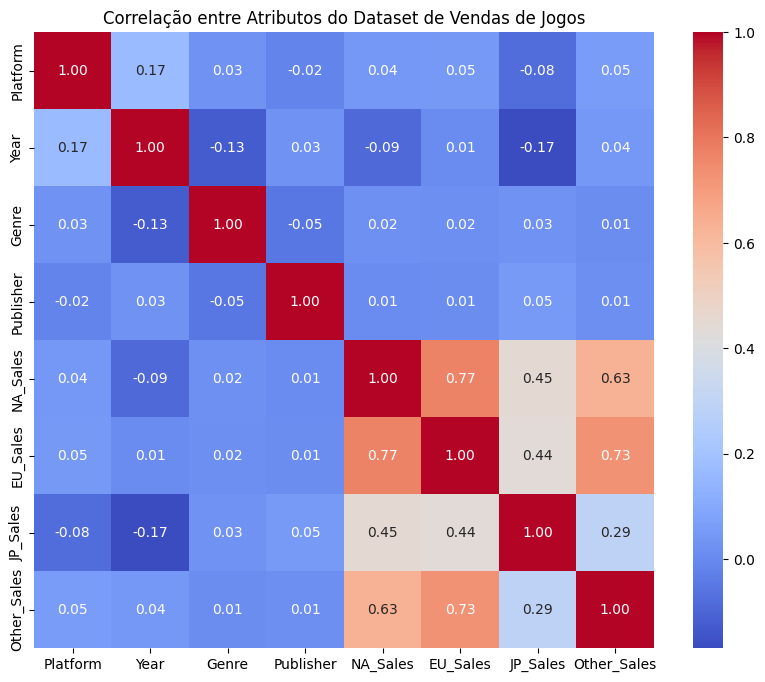

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Atributos do Dataset de Vendas de Jogos")
plt.show()



Treinando com LR=0.01, ativação=relu, épocas=50, batch size=16...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro final (Validação) com LR=0.01, Ativação=relu, Épocas=50, Batch Size=16: 1.0452

Treinando com LR=0.01, ativação=relu, épocas=50, batch size=32...

Erro final (Validação) com LR=0.01, Ativação=relu, Épocas=50, Batch Size=32: 1.3754

Treinando com LR=0.01, ativação=relu, épocas=100, batch size=16...

Erro final (Validação) com LR=0.01, Ativação=relu, Épocas=100, Batch Size=16: 2.1135

Treinando com LR=0.01, ativação=relu, épocas=100, batch size=32...

Erro final (Validação) com LR=0.01, Ativação=relu, Épocas=100, Batch Size=32: 1.7324

Treinando com LR=0.01, ativação=tanh, épocas=50, batch size=16...

Erro final (Validação) com LR=0.01, Ativação=tanh, Épocas=50, Batch Size=16: 1.1270

Treinando com LR=0.01, ativação=tanh, épocas=50, batch size=32...

Erro final (Validação) com LR=0.01, Ativação=tanh, Épocas=50, Batch Size=32: 1.3015

Treinando com LR=0.01, ativação=tanh, épocas=100, batch size=16...

Erro final (Validação) com LR=0.01, Ativação=tanh, Épocas=100, Batch Size=16: 1.551

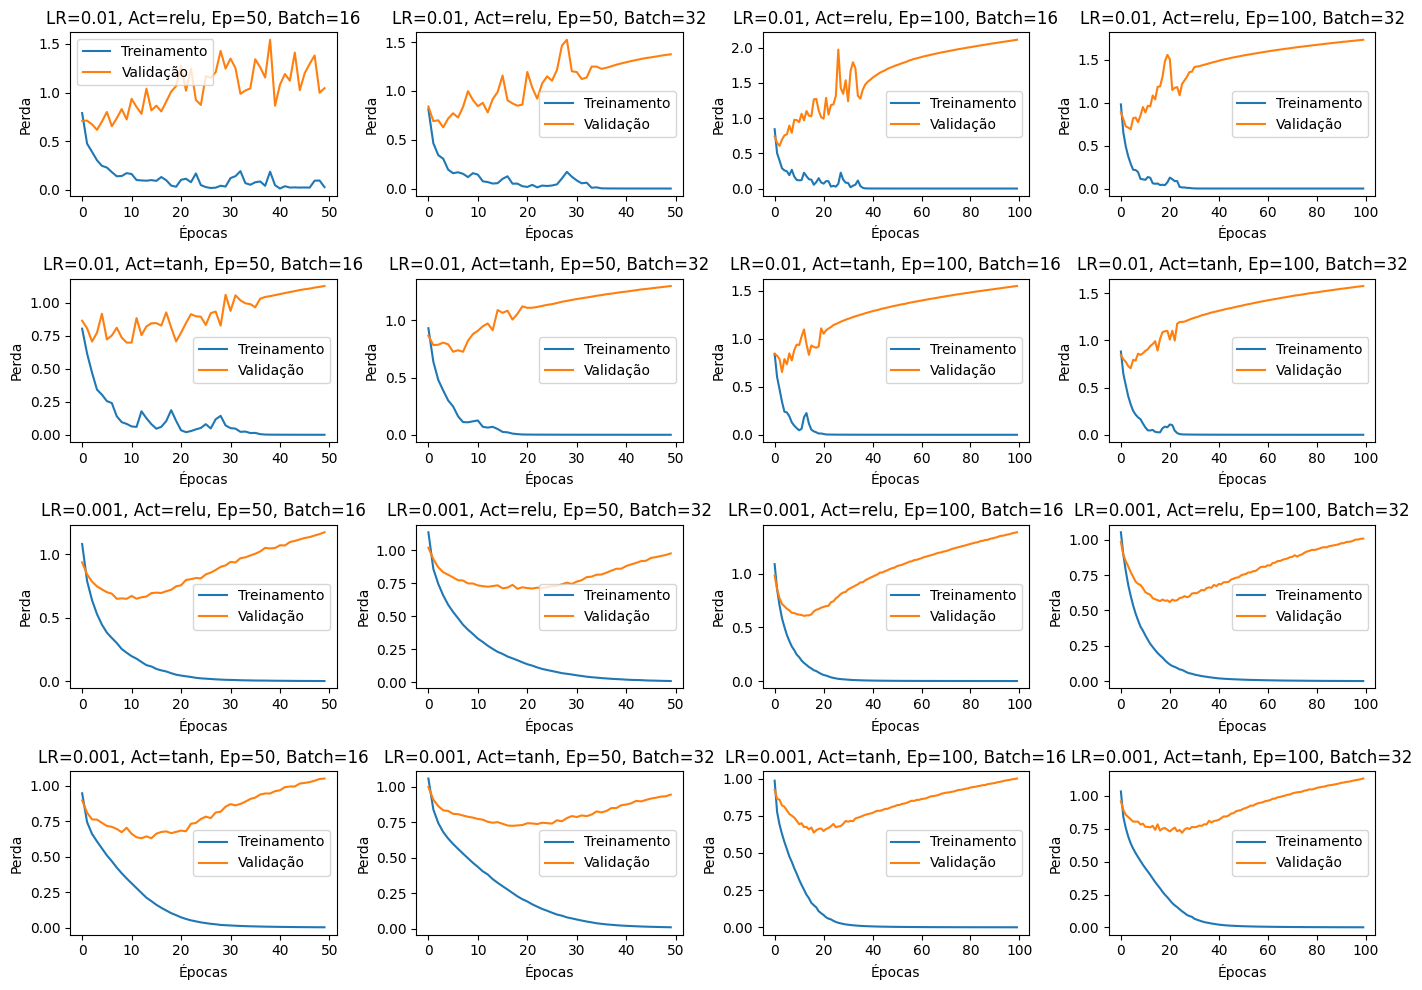

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(learning_rate=0.01, activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(y.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

learning_rates = [0.01, 0.001]
activations = ['relu', 'tanh']
epochs_list = [50, 100]
batch_sizes = [16, 32]

plt.figure(figsize=(14, 10))

plot_index = 1
for lr in learning_rates:
    for activation in activations:
        for epochs in epochs_list:
            for batch_size in batch_sizes:
                print(f"\nTreinando com LR={lr}, ativação={activation}, épocas={epochs}, batch size={batch_size}...\n")
                model = create_model(learning_rate=lr, activation=activation)


                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                    validation_data=(X_test, y_test), verbose=0)

                print(f"Erro final (Validação) com LR={lr}, Ativação={activation}, Épocas={epochs}, Batch Size={batch_size}: {history.history['val_loss'][-1]:.4f}")

                plt.subplot(len(learning_rates) * len(activations), len(epochs_list) * len(batch_sizes), plot_index)
                plt.plot(history.history['loss'], label='Treinamento')
                plt.plot(history.history['val_loss'], label='Validação')
                plt.title(f"LR={lr}, Act={activation}, Ep={epochs}, Batch={batch_size}")
                plt.xlabel('Épocas')
                plt.ylabel('Perda')
                plt.legend()

                plot_index += 1

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


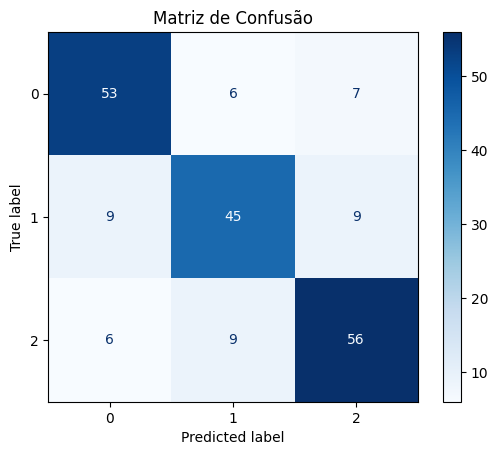

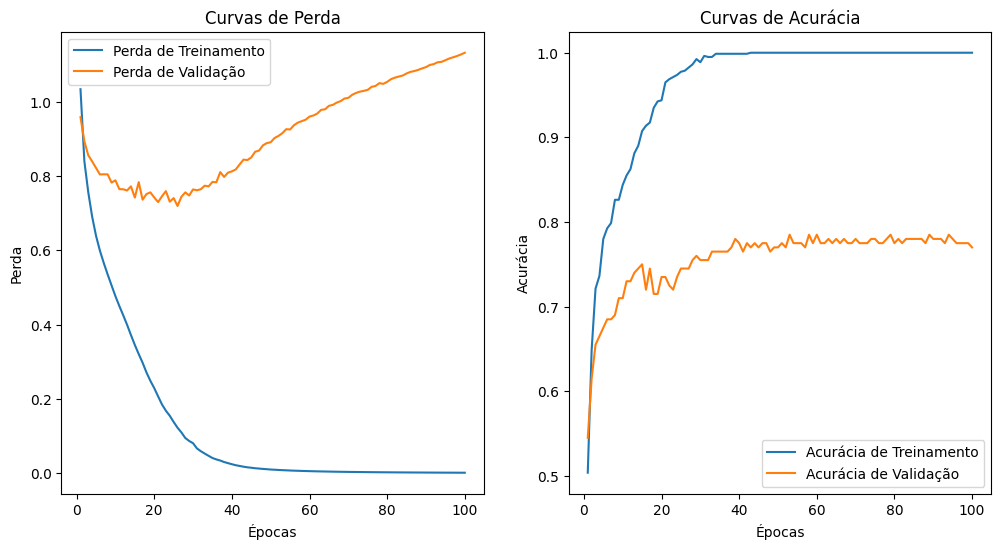

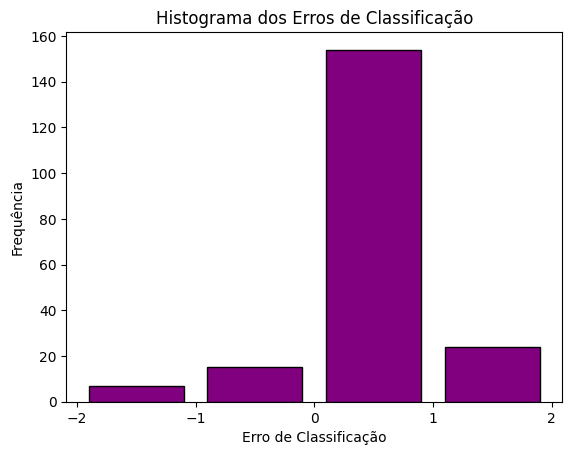

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#Matriz de Confusão
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()

#Curvas de Aprendizado: Perda e Acurácia
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6))

#Perda
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Perda de Treinamento')
plt.plot(epochs_range, history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Curvas de Perda')

#Acurácia
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(epochs_range, history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Curvas de Acurácia')

plt.show()

#Histograma da Distribuição de Erros
errors = y_true - y_pred
plt.hist(errors, bins=np.arange(-2, 3), align='mid', rwidth=0.8, color='purple', edgecolor='black')
plt.xlabel('Erro de Classificação')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros de Classificação')
plt.xticks(range(-2, 3))
plt.show()
